In [1]:
import pandas as pd

In [45]:
full_df = pd.read_csv('../dataset/complete_dataset.csv')
full_df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
full_df.dropna(subset=['text'], inplace=True)

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
full_df.shape

(34491, 19)

In [4]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >= 2:
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [47]:
mean_filenames, embeddings_mean = read_embeddings('../dataset/embeddings_mean.txt')
max_filenames, embeddings_max = read_embeddings('../dataset/embeddings_max.txt')
min_filenames, embeddings_min = read_embeddings('../dataset/embeddings_min.txt')

In [48]:
embeddings_mean.shape, embeddings_max.shape, embeddings_min.shape

((34473, 300), (34473, 300), (34473, 300))

In [49]:
assert mean_filenames.shape == max_filenames.shape == min_filenames.shape
filenames = mean_filenames

In [50]:
df = full_df[full_df['filename'].isin(filenames)].copy()
df.shape

(34473, 19)

In [51]:
# check if everything is in right order for joining data
(df.filename == filenames).all()

True

In [15]:
import re
remove_subcentral_annotation = re.compile(r'übersetzt von.+$', flags=re.I)
remove_season_episode_annotation = re.compile(r's\d+?e\d+?', flags=re.I)
remove_remove_season_episode_annotation_german = re.compile(r'staffel.+?episode', flags=re.I)
remove_remove_season_episode_annotation_german_2 = re.compile(r'staffel.+?folge', flags=re.I)
remove_subcentral_note = re.compile(r'subcentral.+ präsentiert', flags=re.I)
remove_subtitle_statement = re.compile(r'Untertitel von.+$', flags=re.I)
remove_netflix_original_statement = re.compile(r'EINE NETFLIX ORIGINAL SERIE', flags=re.I)
remove_tvuser = re.compile(r'tv4user.+?präsentiert', flags=re.I)
remove_tvuser_subcentral = re.compile(r'subcentral.+?tv4user', flags=re.I)
remove_subcentral_url = re.compile(r'subcentral\.de', flags=re.I)
remove_tv4user_url = re.compile(r'tv4user\.de', flags=re.I)
remove_sub_statement = re.compile(r'subbed\w+?by', flags=re.I)
remove_tiger_statement = re.compile(r'übersetzung filmtiger', flags=re.I)

for regex in (remove_subcentral_annotation,
              remove_season_episode_annotation,
              remove_remove_season_episode_annotation_german,
              remove_remove_season_episode_annotation_german_2,
              remove_subcentral_note,
              remove_subtitle_statement,
              remove_netflix_original_statement,
              remove_tvuser,
              remove_tvuser_subcentral,
              remove_subcentral_url,
              remove_tv4user_url,
              remove_sub_statement,
              remove_tiger_statement):
    
    df.text = df.text.str.replace(regex, '')

In [16]:
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
107,6094543.xml,"Zuvor bei "" The Blacklist "" ... - Willst du de...",tt3276470,"Crime,Drama,Mystery",1191.0,NaN,untokenisiert,43,nm0250267,"nm0092578,nm0071299",tvEpisode,The Pavlovich Brothers (Nos. 119-122),The Pavlovich Brothers (Nos. 119-122),0.0,2014.0,NaN,43,8.6,1732.0
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,4711374.xml,DER TODESKUSS Kriminaldrama in drei Akten Kame...,tt6617,"Comedy,Crime,Drama",1916.0,NaN,untokenisiert,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
import re
df.production_region = df.production_region.fillna("Unknown")
df['main_region'] = [
    'English' if "English" in list(map(lambda x: re.sub(r'\s+','', x), production_region.split(','))) else "Other" for production_region in df.production_region
]

In [53]:
df.genre = df.genre.fillna("Unknown")
df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df.text)

In [ ]:
from umap import UMAP

reducer = UMAP()
Xr_tfidf = reducer.fit_transform(X_tfidf)

In [19]:
from umap import UMAP

reducer = UMAP(n_neighbors=15)
Xr_mean = reducer.fit_transform(embeddings_mean)

reducer = UMAP(n_neighbors=15)
Xr_max = reducer.fit_transform(embeddings_max)

reducer = UMAP(n_neighbors=15)
Xr_min = reducer.fit_transform(embeddings_min)

In [ ]:
import seaborn as sns
sns.scatterplot(x=Xr_tfidf[:,0], y=Xr_tfidf[:,1])

In [ ]:
import seaborn as sns
sns.scatterplot(x=Xr_mean[:,0], y=Xr_mean[:,1])

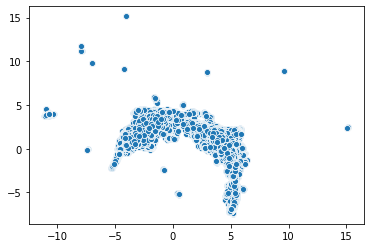

In [21]:
import seaborn as sns
sns.scatterplot(x=Xr_min[:,0], y=Xr_min[:,1])

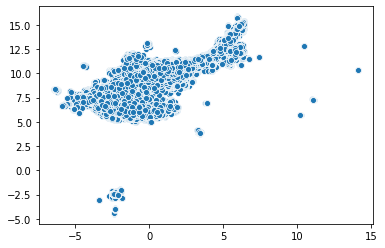

In [22]:
import seaborn as sns
sns.scatterplot(x=Xr_max[:,0], y=Xr_max[:,1])

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Xr_mean_pca = pca.fit_transform(embeddings_mean)

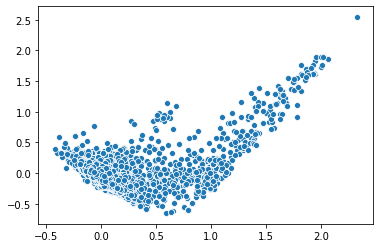

In [24]:
import seaborn as sns
sns.scatterplot(x=Xr_mean_pca[:,0], y=Xr_mean_pca[:,1])

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Xr_min_pca = pca.fit_transform(embeddings_min)

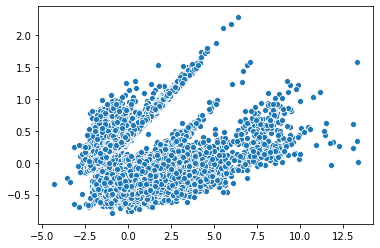

In [26]:
import seaborn as sns
sns.scatterplot(x=Xr_min_pca[:,0], y=Xr_min_pca[:,1])

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Xr_max_pca = pca.fit_transform(embeddings_max)

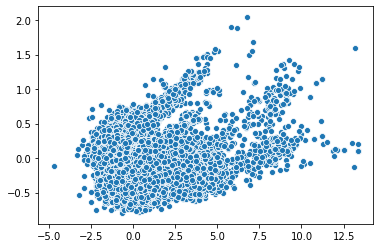

In [28]:
import seaborn as sns
sns.scatterplot(x=Xr_max_pca[:,0], y=Xr_max_pca[:,1])

In [64]:
from sklearn.cluster import DBSCAN, KMeans 
from sklearn.mixture import GaussianMixture

clu = KMeans(n_clusters=2, n_jobs=-1)
#clu = DBSCAN(n_jobs=-1)
labels = clu.fit_predict(embeddings_min)



/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


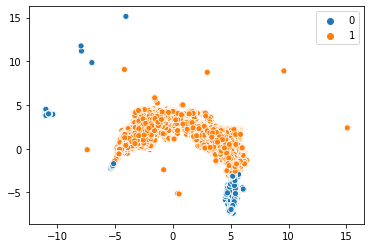

In [67]:
import seaborn as sns
sns.scatterplot(x=Xr_min[:,0], y=Xr_min[:,1], hue=labels)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(embeddings_max, labels)

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8653
           1       1.00      1.00      1.00      8593

    accuracy                           1.00     17246
   macro avg       1.00      1.00      1.00     17246
weighted avg       1.00      1.00      1.00     17246



In [53]:
embeddings_max.shape, df.shape

((68982, 300), (34491, 21))

In [29]:
ham_df = df[(df.writers.str.contains("nm1363595")) | (df.directors.str.contains("nm1363595"))].copy()
ham_df['Serie'] = ["Community" if entry.genre == "Comedy" else "Rick and Morty" for index, entry in ham_df.iterrows()]

In [30]:
ham_df

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_region,main_genre,Serie
29778,3611170.xml,"Wie kann man das ausmachen ? Mama , kannst du ...",tt1467481,Comedy,2009.0,Unknown,untokenisiert,26,"nm0751577,nm0751648",nm1363595,...,Pilot,0.0,2009.0,NaN,26,7.8,3247.0,Other,Comedy,Community
29884,4303454.xml,Hey Man . Ich bin Jeff . Ich versuche meinen Z...,tt1480354,Comedy,2009.0,Unknown,untokenisiert,21,nm0751577,"nm1363595,nm0387684,nm0689390,nm1560199",...,Introduction to Film,0.0,2009.0,NaN,21,8.3,2755.0,Other,Comedy,Community
30065,3611172.xml,Guten Nachmittag Greendale Community College ....,tt1503241,Comedy,2009.0,Unknown,untokenisiert,22,nm0751648,"nm1363595,nm1560199",...,Spanish 101,0.0,2009.0,NaN,22,7.9,2817.0,Other,Comedy,Community
30181,3884736.xml,Guten Morgen Greendale Community College . Hie...,tt1515324,Comedy,2009.0,Unknown,untokenisiert,21,nm0751648,"nm1363595,nm2314834,nm1560199",...,Advanced Criminal Law,0.0,2009.0,NaN,21,7.9,2420.0,Other,Comedy,Community
30183,3884943.xml,Ein kleiner verblassender Rest eines Sterns . ...,tt1515325,Comedy,2009.0,Unknown,untokenisiert,21,nm0751648,"nm1363595,nm1417395,nm1560199",...,"Football, Feminism and You",0.0,2009.0,NaN,21,7.8,2377.0,Other,Comedy,Community
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54602,6398715.xml,"Hey , jetzt ist Golf einfach ! Aah ! Golf ist ...",tt4832266,"Adventure,Animation,Comedy",2015.0,Unknown,untokenisiert,24,"nm0033741,nm0585086","nm1551598,nm1363595,nm3171597,nm0572982,nm3452...",...,Get Schwifty,0.0,2015.0,NaN,24,8.3,8421.0,Other,Adventure,Rick and Morty
54604,6405278.xml,"Ich kann nicht glauben , dass wir eine Version...",tt4832268,"Adventure,Animation,Comedy",2015.0,Unknown,untokenisiert,23,"nm0585086,nm0688913","nm1551598,nm1363595,nm4155289,nm0572982,nm3452...",...,The Ricks Must Be Crazy,0.0,2015.0,NaN,23,9.3,10004.0,Other,Adventure,Rick and Morty
54606,6415235.xml,WELTRAUM-NOTAUFNAHME Macht euch keine Sorgen u...,tt4832274,"Adventure,Animation,Comedy",2015.0,Unknown,untokenisiert,23,"nm1090137,nm0585086","nm1551598,nm1363595,nm4155289,nm2466457,nm0572...",...,Interdimensional Cable 2: Tempting Fate,0.0,2015.0,NaN,23,7.7,8130.0,Other,Adventure,Rick and Morty
54608,6416163.xml,"Ich muss schon sagen , Rick . Es ist schon gei...",tt4832276,"Adventure,Animation,Comedy",2015.0,Unknown,untokenisiert,23,"nm0688913,nm0585086","nm1551598,nm1363595,nm2466457,nm0572982,nm6066...",...,Look Who's Purging Now,0.0,2015.0,NaN,23,8.6,8056.0,Other,Adventure,Rick and Morty


In [31]:
import re
remove_subcentral_annotation = re.compile(r'übersetzt von.+$', flags=re.I)
remove_season_episode_annotation = re.compile(r's\d+?e\d+?', flags=re.I)
remove_subcentral_note = re.compile(r'subcentral präsentiert.+$', flags=re.I)

In [32]:
ham_df.text = ham_df.text.str.replace(remove_subcentral_annotation, '')
ham_df.text = ham_df.text.str.replace(remove_season_episode_annotation, '')
ham_df.text = ham_df.text.str.replace(remove_subcentral_note, '')

In [33]:
ham_df.groupby('Serie').describe()

year                                                        \
               count        mean       std     min     25%     50%     75%   
Serie                                                                        
Community       58.0  2010.87931  1.612208  2009.0  2010.0  2010.5  2011.0   
Rick and Morty  18.0  2014.50000  0.923548  2013.0  2014.0  2014.5  2015.0   

                       isAdult       ... averageRating      numVotes  \
                   max   count mean  ...           75%  max    count   
Serie                                ...                               
Community       2014.0    58.0  0.0  ...         8.800  9.8     58.0   
Rick and Morty  2017.0    18.0  0.0  ...         8.975  9.6     18.0   

                                                                             \
                       mean          std     min      25%     50%       75%   
Serie                                                                         
Community       2531.896552   983.970130  1484.0  2107.00  2299.5   2727.75   
Rick and Morty  9591.833333  1922.953343  8056.0  8422.75  9143.0  10019.75   

                         
                    max  
Serie                    
Community        8344.0  
Rick and Morty  15868.0  

[2 rows x 48 columns]

In [19]:
import numpy as np
from flair.embeddings import DocumentRNNEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, TransformerDocumentEmbeddings
from nltk.tokenize import sent_tokenize

doc_embeddings = TransformerDocumentEmbeddings('bert-base-german-cased')


from flair.data import Sentence
from tqdm import tqdm_notebook
embeddings = []

for index, row in tqdm_notebook(ham_df.iterrows()):
    sent_embeddings = []
    for sent in sent_tokenize(row.text):
        doc = Sentence(sent)
        doc_embeddings.embed(doc)
        sent_embedding = doc.embedding.cpu().detach().numpy()
        sent_embeddings.append(sent_embedding)
    embeddings.append(np.asarray(sent_embeddings))
len(embeddings)

<ipython-input-19-290612495fc3>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm_notebook(ham_df.iterrows()):


76

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from stop_words import get_stop_words

tfidf = TfidfVectorizer(stop_words=get_stop_words('de'))
cv = CountVectorizer(stop_words=get_stop_words('de'))

cv_feat = cv.fit_transform(ham_df.text)
tfidf_feat = tfidf.fit_transform(ham_df.text)

In [35]:
from umap import UMAP

In [36]:
umap = UMAP(n_components=2)

Xr_cv = umap.fit_transform(cv_feat)

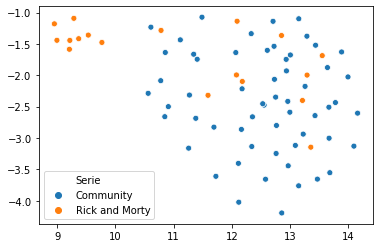

In [37]:
import seaborn as sns
sns.scatterplot(x=Xr_cv[:,0], y=Xr_cv[:,1], hue=ham_df.Serie)

In [38]:
print(ham_df[ham_df.year == 2017].text)

59854    Wie auch immer , so bin ich jedenfalls aus dem...
Name: text, dtype: object


In [39]:
umap = UMAP(n_components=2)

Xr_tfidf = umap.fit_transform(tfidf_feat)

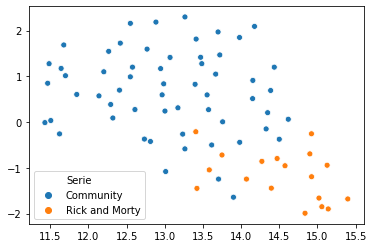

In [40]:
import seaborn as sns
sns.scatterplot(x=Xr_tfidf[:,0], y=Xr_tfidf[:,1], hue=ham_df.Serie)